In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#Loading and reading the CSV File
df = pd.read_csv("/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


DATA PREPROCESSING


In [ ]:
#printing the descriptive statistics of the dataset
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
print(df['BP'].unique())

['HIGH' 'LOW' 'NORMAL']


In [ ]:
print(df['Sex'].unique())

['F' 'M']


In [ ]:
print(df['Cholesterol'].unique())

['HIGH' 'NORMAL']


In [ ]:
print(df['Drug'].unique())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
#Checking for null values in the dataset
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

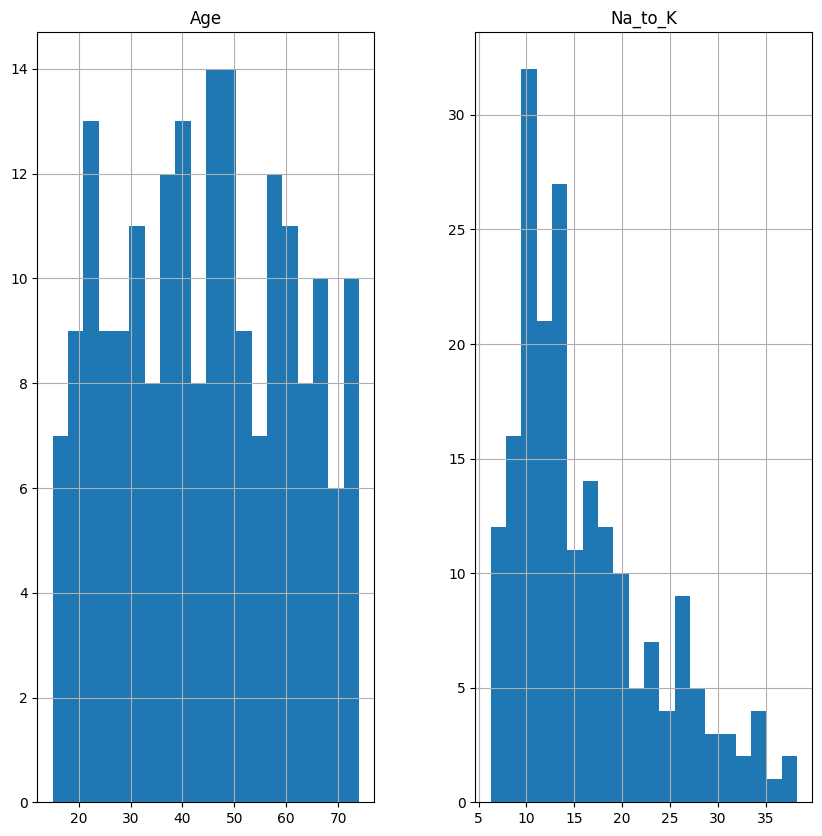

In [ ]:
df.hist(bins=20,figsize=(10,10))

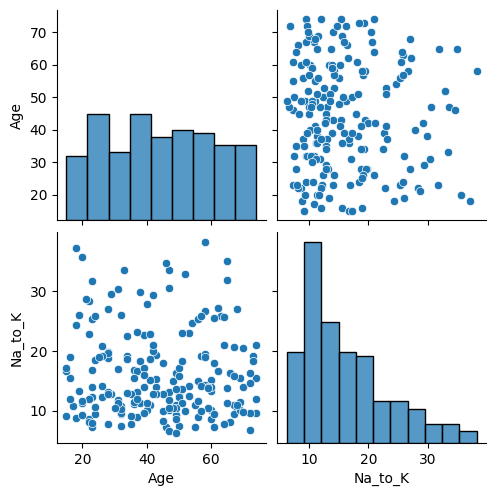

In [ ]:
#Pair plot visulisation
sn.pairplot(df)

([<matplotlib.patches.Wedge at 0x7f0d3293abc0>,
 [Text(0.15499131026807186, 1.0890260298732013, 'DrugY'),
  Text(-0.9287606496234333, -0.5894095823033915, 'drugC'),
  Text(0.22306619331099625, -1.0771450568060652, 'drugX'),
  Text(0.801865608605421, -0.7530016903937586, 'drugA'),
  Text(1.0654415171968743, -0.27355872026536265, 'drugB')],
 [Text(0.08454071469167555, 0.5940141981126551, '45.5%'),
  Text(-0.5065967179764181, -0.3214961358018498, '27.0%'),
  Text(0.12167246907872521, -0.5875336673487628, '11.5%'),
  Text(0.43738124105750237, -0.4107281947602319, '8.0%'),
  Text(0.5811499184710223, -0.1492138474174705, '8.0%')])

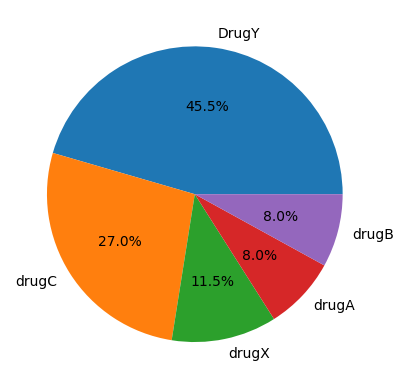

In [ ]:
plt.pie(df['Drug'].value_counts(),autopct ='%1.1f%%',labels=['DrugY','drugC','drugX','drugA','drugB'])

<Axes: xlabel='Sex', ylabel='count'>

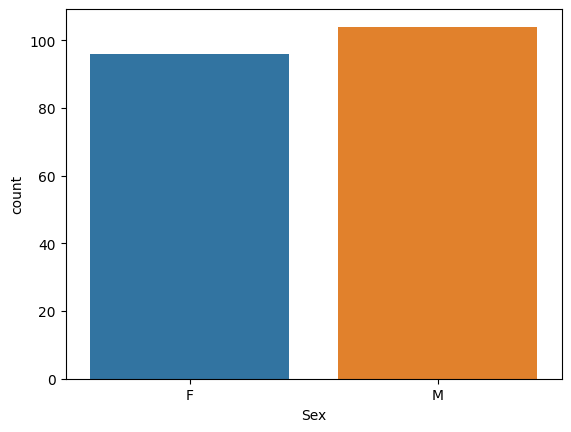

In [ ]:
sn.countplot(x=df["Sex"])

<Axes: xlabel='Age', ylabel='Na_to_K'>

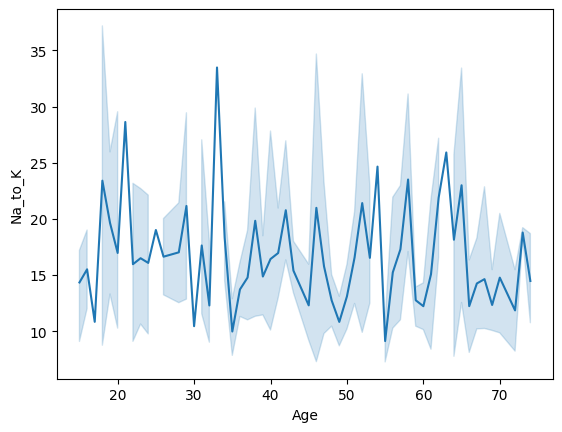

In [ ]:
sn.lineplot(x=df['Age'],y=df['Na_to_K'])

<ipython-input-24-e75800ca8089>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True)


<Axes: >

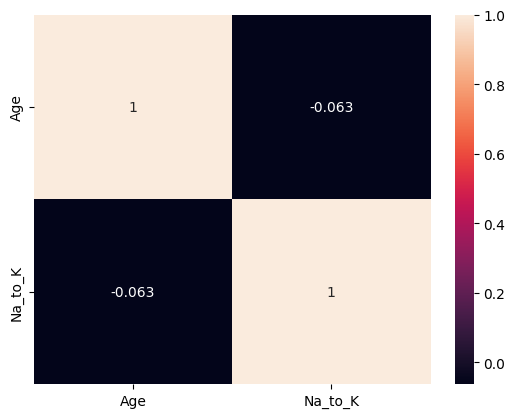

In [ ]:
#Heat map visulisation
sn.heatmap(df.corr(),annot=True)

OUTLIER DETECTION TO DETECT OUTLIERS WE NEED TO VISUALIZE BOXPLOT OF THE DATA


<Axes: >

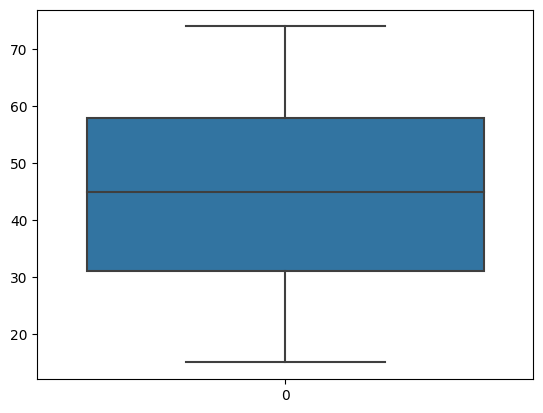

In [ ]:
sn.boxplot(df["Age"])

AGE COLUMN IN OUR DATASET HAS NO OUTLIERS


<Axes: >

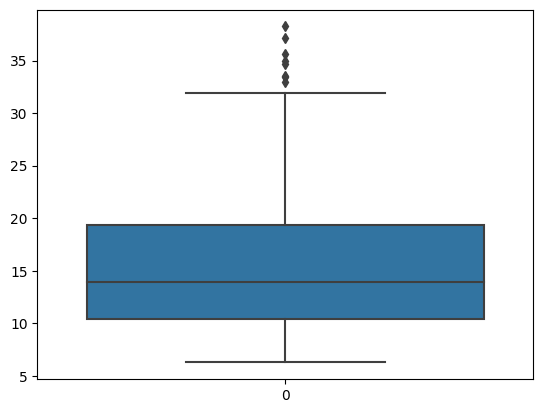

In [ ]:
sn.boxplot(df['Na_to_K'])

In [ ]:
#Handling the outliers using the IQR method
q1 = df.Na_to_K.quantile(.25)
print(q1)
q3 = df.Na_to_K.quantile(.75)
print(q3)

10.4455
19.38


In [ ]:
IQR = q3-q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR  
lower_limit = q1-1.5*IQR

In [ ]:
upper_limit

32.78175

In [ ]:
df = df[df['Na_to_K']<upper_limit]

<Axes: >

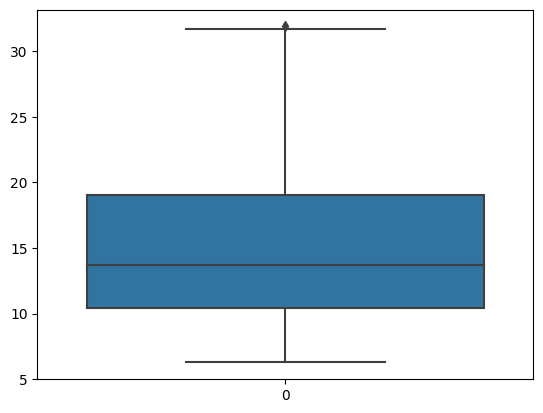

In [ ]:
sn.boxplot(df['Na_to_K'])

In [ ]:
#Splitting the dependent and independent variables
#Feature extraction of data

In [ ]:
  #Feature variables
  x = df.iloc[:,0:5]
  x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
#Target values
y = df.iloc[:,-1]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
x['Sex']=x['Sex'].replace({'F':0,'M':1})
x['BP']=x['BP'].replace({'HIGH':0,'LOW':1,'NORMAL':2})
x['Cholesterol']=x['Cholesterol'].replace({'HIGH':0,'NORMAL':1})


In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [ ]:
y = pd.get_dummies(df.iloc[:,5:]).values
y

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0,

SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print(xtrain.shape)
print(xtrain.head())

(153, 5)
     Age  Sex  BP  Cholesterol  Na_to_K
83    38    0   0            1   11.326
112   35    1   1            1    9.170
167   57    0   2            0   14.216
36    32    1   0            1    9.445
140   49    1   0            1    6.269


In [ ]:
print(xtest.shape)
print(xtest.head())

(39, 5)
     Age  Sex  BP  Cholesterol  Na_to_K
46    37    0   0            0   13.091
141   64    0   1            1   25.741
77    26    0   0            1   19.161
148   61    0   1            1    7.340
116   67    1   2            1    9.514


In [ ]:
print(ytrain.shape)
print(ytrain)

(153, 5)
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0

In [ ]:
print(ytest.shape)
print(ytest)

(39, 5)
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

# Initializing the seq model
model = Sequential()
# Adding the input layer to the model
model.add(Dense(32,activation='relu',input_dim=x.shape[1]))
# Adding the 1st hidden layer to the model
model.add(Dense(16,activation='relu'))
# Adding the 2nd hidden layer to the model
model.add(Dense(8,activation='relu'))
#Adding the 3rd hidden layer to the model
model.add(Dense(4,activation='relu'))
# Adding output layer
model.add(Dense(5,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain,ytrain,epochs=10,batch_size=3,validation_data=(xtest,ytest))


Epoch 1/10
51/51 [==============================] - 2s 8ms/step - loss: 2.2257 - accuracy: 0.1765 - val_loss: 1.6150 - val_accuracy: 0.1282
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5920 - accuracy: 0.4314 - val_loss: 1.5877 - val_accuracy: 0.3590
Epoch 3/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5771 - accuracy: 0.4118 - val_loss: 1.5744 - val_accuracy: 0.4103
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5546 - accuracy: 0.5033 - val_loss: 1.5662 - val_accuracy: 0.3333
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5412 - accuracy: 0.4575 - val_loss: 1.5485 - val_accuracy: 0.3846
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5192 - accuracy: 0.4837 - val_loss: 1.5376 - val_accuracy: 0.4103
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 1.5010 - accuracy: 0.5359 - val_loss: 1.5245 - val_accuracy: 0.3846
Epoch 8/10
51/51 [==

In [ ]:
# Testing the model
ypred = model.predict(xtest)

2/2 [==============================] - 0s 8ms/step
